In [13]:
import turicreate 


In [14]:
sales = turicreate.SFrame('home_data.sframe')

In [15]:
sales

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    |    2.0    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000.0 |   4.0    |    4.5    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500.0 |   3.0    |    2.25   |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850.0 |   3.0    |    1.5    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500.0 |   3.0    |    1.0    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000.0 |   3.0    |    2.5    |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1180.0   |  5650.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2570.0   |  7242.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    770.0    | 10000.0  |  1.0   |     0      |  0   |     3     |  6.0  |
|    1960.0   |  5000.0  |  1.0   |     0      |  0   |     5     |  7.0  |
|    1680.0   |  8080.0  |  1.0   |     0      |  0   |     3     |  8.0  |
|    5420.0   | 101930.0 |  1.0   |     0      |  0   |     3     |  11.0 |
|    1715.0   |  6819.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    1060.0   |  9711.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1780.0   |  7470.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1890.0   |  6560.0  |  2.0   |     0      |  0   |     3     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1180.0   |      0.0      |  1955.0  |     0.0      |  98178  | 47.51123398 |
|   2170.0   |     400.0     |  1951.0  |    1991.0    |  98125  | 47.72102274 |
|   770.0    |      0.0      |  1933.0  |     0.0      |  98028  | 47.73792661 |
|   1050.0   |     910.0     |  1965.0  |     0.0      |  98136  |   47.52082  |
|   1680.0   |      0.0      |  1987.0  |     0.0      |  98074  | 47.61681228 |
|   3890.0   |     1530.0    |  2001.0  |     0.0      |  98053  | 47.65611835 |
|   1715.0   |      0.0      |  1995.0  |     0.0      |  98003  | 47.30972002 |
|   1060.0   |      0.0      |  1963.0  |     0.0      |  98198  | 47.40949984 |
|   1050.0   |     730.0     |  1960.0  |     0.0      |  98146  | 47.51229381 |
|   1890.0   |      0.0      |  2003.0  |     0.0      |  98038  | 47.36840673 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
|  -122.3188624 |     1690.0    | ... |
| -122.23319601 |     2720.0    | ... |
| -122.39318505 |     1360.0    | ... |
| -122.04490059 |     1800.0    | ... |
| -122.00528655 |     4760.0    | ... |

In [16]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [ ]:
tc.visualization.scatter(sales["sqft_living"], ["price"])


In [65]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [17]:
training_set,test_set = sales.random_split(.8,seed = 0)

In [39]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.011124     | 4352659.062881     | 3143162.272710       | 262637.158677                   | 268703.472591                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [41]:
print (test_set['price'].mean())

543054.0425632532


In [42]:
sqft_model.evaluate(test_set)

{'max_error': 4145927.441456345, 'rmse': 255177.88868524614}

In [49]:
sqft_model.coefficients

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+---------------------+-------------------+
|     name    | index |        value        |       stderr      |
+-------------+-------+---------------------+-------------------+
| (intercept) |  None | -46008.119286635076 | 5046.861078413032 |
| sqft_living |  None |  281.6057308220718  |  2.21832211134907 |
+-------------+-------+---------------------+-------------------+
[2 rows x 4 columns]

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

NameError: name 'sqft_model' is not defined

In [102]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode','waterfront']

In [103]:
sales[my_features]

Columns:
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	zipcode	str
	waterfront	int

Rows: 21613

Data:
+----------+-----------+-------------+----------+--------+---------+------------+
| bedrooms | bathrooms | sqft_living | sqft_lot | floors | zipcode | waterfront |
+----------+-----------+-------------+----------+--------+---------+------------+
|   3.0    |    1.0    |    1180.0   |  5650.0  |  1.0   |  98178  |     0      |
|   3.0    |    2.25   |    2570.0   |  7242.0  |  2.0   |  98125  |     0      |
|   2.0    |    1.0    |    770.0    | 10000.0  |  1.0   |  98028  |     0      |
|   4.0    |    3.0    |    1960.0   |  5000.0  |  1.0   |  98136  |     0      |
|   3.0    |    2.0    |    1680.0   |  8080.0  |  1.0   |  98074  |     0      |
|   4.0    |    4.5    |    5420.0   | 101930.0 |  1.0   |  98053  |     0      |
|   3.0    |    2.25   |    1715.0   |  6819.0  |  2.0   |  98003  |     0      |
|   3.0    |    1.5    |    1060.0   |  9711.0  |  1.0   |  98198  |     0      |
|   3.0    |    1.0    |    1780.0   |  7470.0  |  1.0   |  98146  |     0      |
|   3.0    |    2.5    |    1890.0   |  6560.0  |  2.0   |  98038  |     0      |
+----------+-----------+-------------+----------+--------+---------+------------+
[21613 rows x 7 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [104]:
sales[my_features].show()


Materializing SFrame

In [141]:
turicreate.show(sales['zipcode'],sales['price'])



Materializing X axis SArray

Materializing Y axis SArray

# Assignment answers Start

In [39]:
highest = sales[sales['zipcode']=='98039']
print (highest['price'].mean())




2160606.5999999996


2160606.5999999996

In [144]:
len(sales[(sales['sqft_living'] >= 2000) & (sales['sqft_living'] <= 4000)])/len(sales)



0.4266413732475825

In [29]:
sales1 = turicreate.SFrame('home_data.sframe')

In [30]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
my_features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
my_features_model2 = turicreate.linear_regression.create(training_set,target='price',features=my_features2)
advanced_features_model = turicreate.linear_regression.create(training_set,target='price',features=advanced_features)


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.019968     | 4084057.474195     | 1893048.177204       | 190061.574258                   | 172743.844451                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.031879     | 4374045.911004     | 3475841.652195       | 159529.856880                   | 211339.871343                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [32]:
print (my_features_model2.evaluate(test_set)['rmse']-advanced_features_model.evaluate(test_set)['rmse'])


25702.039126136806


# Week 2 assignment ans end here

In [ ]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features) 

In [108]:
print (my_features)


['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'waterfront']


In [109]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4145927.441456345, 'rmse': 255177.88868524614}
{'max_error': 3245553.9724982204, 'rmse': 168003.6316167943}


In [110]:
house1 = sales[sales['id']=='5309101200']

In [111]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

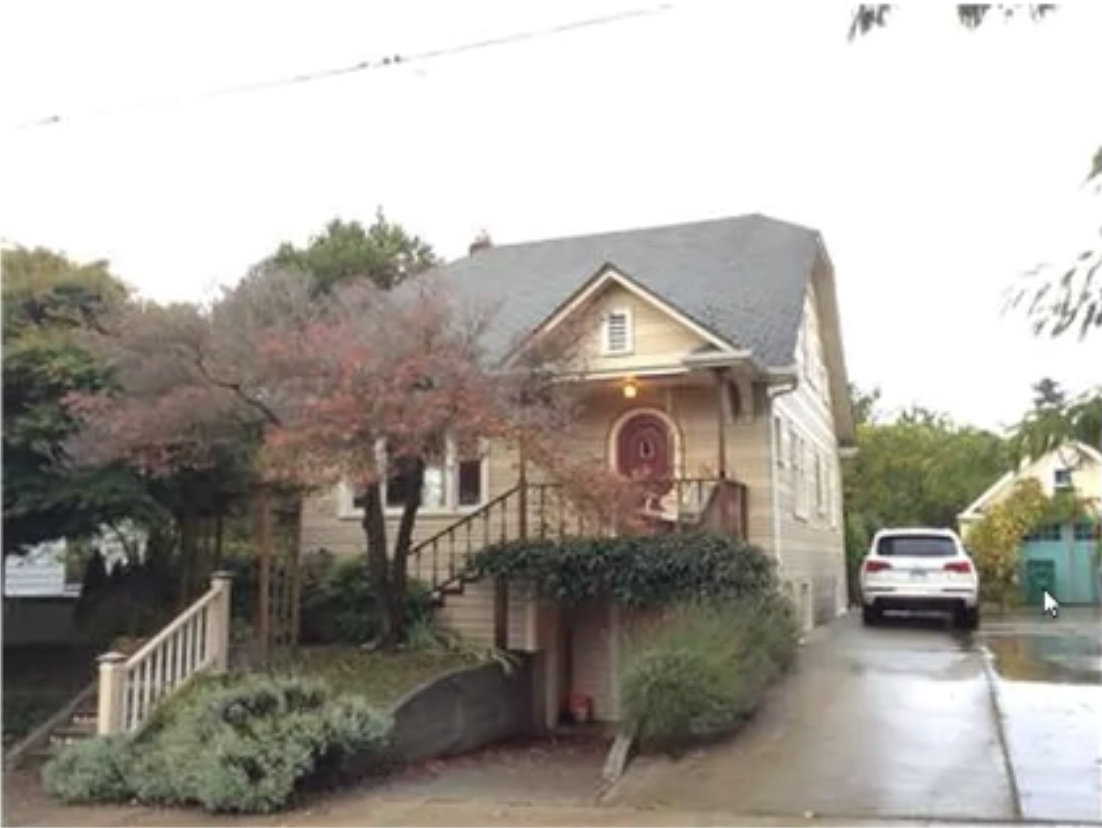

In [81]:
from IPython.display import Image

Image(filename='house_images/house1.png') 

In [112]:
print (house1['price'])

[620000.0, ... ]


In [113]:
print(sqft_model.predict(house1))

[629845.6346863372]


In [114]:
print(my_features_model.predict(house1))

[726721.8406315262]


In [115]:
house2 = sales[sales['id']=='1925069082']

In [116]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

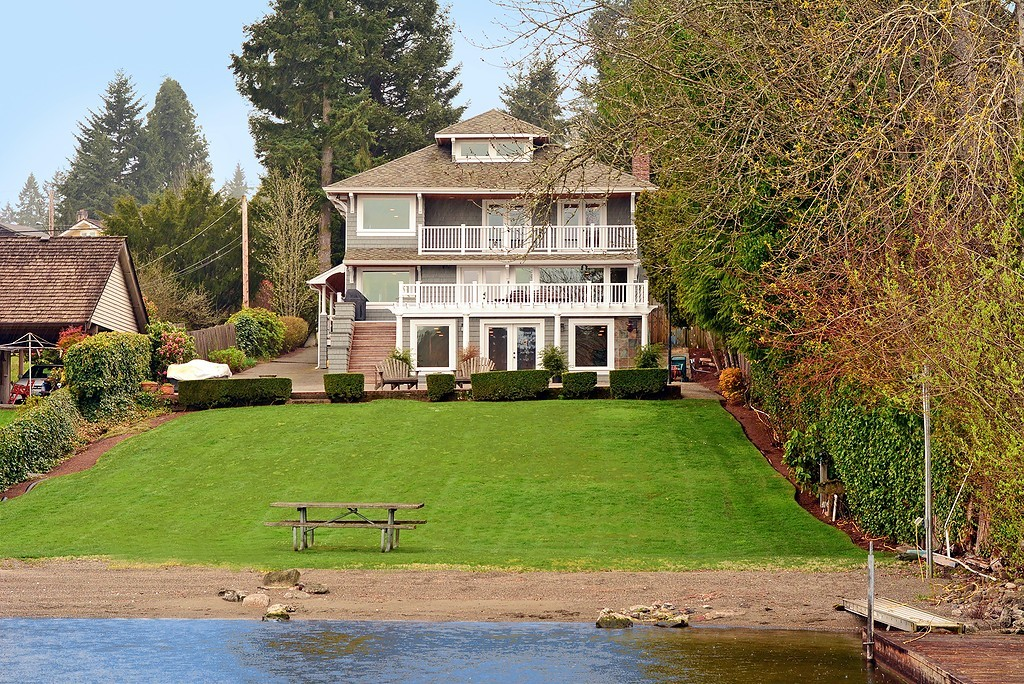

In [94]:
from IPython.display import Image
Image(filename='house_images/house2.jpg') 

In [117]:
print(sqft_model.predict(house2))

[1260642.4717277782]


In [118]:
print(my_features_model.predict(house2))

[2036712.1261447975]


In [119]:
print (my_features_model.predict(house2))

[2036712.1261447975]


In [120]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

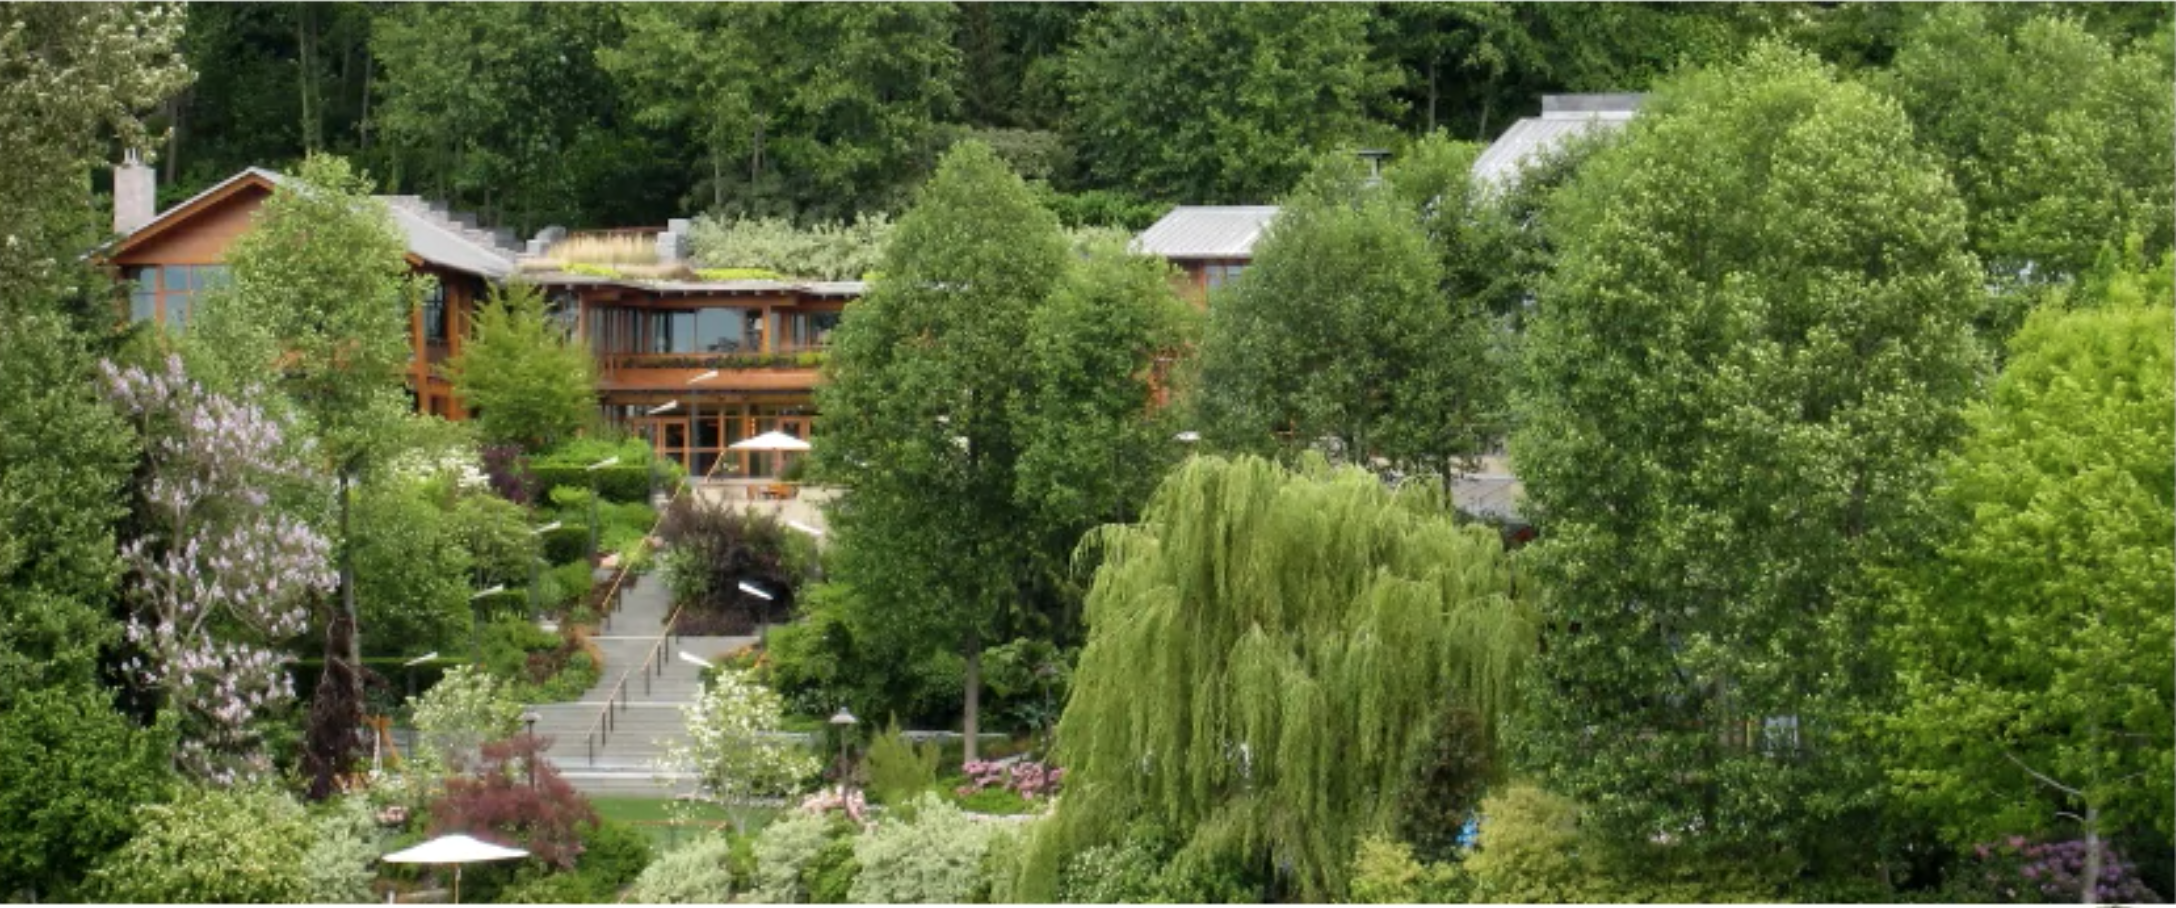

In [123]:
from IPython.display import Image
Image(filename='house_images/bill_gates.png') 

In [127]:
print(my_features_model.predict(turicreate.SFrame(bill_gates)))

[15192892.993174687]
